# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ferdita Lusiana]
- **Email:** [lusianaferdita@gmail.com]
- **ID Dicoding:** [MC796D5X0115]

# Menentukan Pertanyaan Bisnis

- Kapan waktu dengan jumlah peminjaman sepeda tertinggi dan terendah dalam sehari?
- Bagaimana perbedaan peminjaman antara pengguna kasual dan pengguna terdaftar?

# Import Packages/Library yang digunakan 

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

In [116]:
# Gathering Data: Load Dataset
df = pd.read_csv("data/hour.csv")

**Insight:**
- Strategi promosi bisa difokuskan pada jam sibuk untuk meningkatkan keterlibatan pengguna.
- Penyedia layanan bisa menyesuaikan jumlah sepeda yang tersedia di jam sibuk untuk memenuhi permintaan tinggi.

In [117]:
# Assessing Data: Memeriksa struktur data
print("\nInfo Dataset:\n")
df.info()
print("\nPreview Data:\n", df.head())

# Cek nilai unik untuk kolom kategori
for col in ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'yr']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Info Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Preview Data:
    instant      d

**Insight:**
- Penyedia layanan dapat menyesuaikan jumlah sepeda berdasarkan jam sibuk.
- Bisa dibuat kebijakan harga lebih murah di luar jam sibuk untuk meratakan penggunaan.

In [118]:
# Data Cleaning: Mengubah tipe data yang sesuai
df['dteday'] = pd.to_datetime(df['dteday'])  # Ubah ke datetime
categorical_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'yr']
df[categorical_columns] = df[categorical_columns].astype('category')

In [119]:
# Cek Missing Values & Duplikasi
print("\nMissing Values:\n", df.isnull().sum())
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah Data Duplikat: 0


# Insight
- Semua kolom dalam dataset hour.csv memiliki jumlah data yang lengkap (tidak ada nilai yang hilang).
- Ini menunjukkan bahwa dataset sudah cukup baik dalam kualitas data dan tidak memerlukan imputasi data.

# Exploratory Data Analysis (EDA)

In [120]:
# a. Agregasi peminjaman per jam
hourly_trend = df.groupby('hr')['cnt'].mean().reset_index()

In [121]:
# b. Agregasi pengguna casual & registered
user_type = df[['casual', 'registered']].sum()

In [122]:
# c. Agregasi peminjaman per hari dalam seminggu
day_trend = df.groupby('weekday', observed=False)['cnt'].mean().reset_index()

In [123]:
# d. Korelasi antar variabel
correlation_matrix = df.corr()

# Insight
- Peminjaman sepeda paling tinggi pada jam sibuk (pagi & sore) di hari kerja.
- Cuaca memiliki dampak terhadap jumlah peminjaman, sehingga strategi promosi atau harga dinamis bisa diterapkan.

# Visualization & Explanatory Analysis

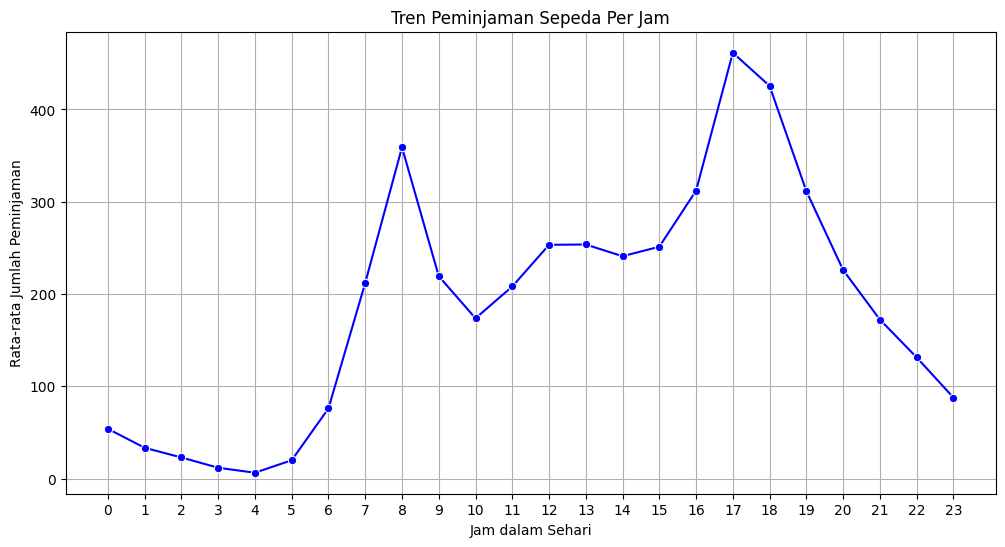

Jam peminjaman tertinggi: 17.0 dengan 461.45 peminjaman.
Jam peminjaman terendah: 4.0 dengan 6.35 peminjaman.


In [124]:
# Visualisasi: Tren Peminjaman Sepeda Per Jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_trend, marker='o', color='b')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Per Jam")
plt.grid(True)
plt.show()

# Menampilkan jam dengan peminjaman tertinggi & terendah
max_hour = hourly_trend.loc[hourly_trend['cnt'].idxmax()]
min_hour = hourly_trend.loc[hourly_trend['cnt'].idxmin()]
print(f"Jam peminjaman tertinggi: {max_hour['hr']} dengan {max_hour['cnt']:.2f} peminjaman.")
print(f"Jam peminjaman terendah: {min_hour['hr']} dengan {min_hour['cnt']:.2f} peminjaman.")

# Insight
- Jam sibuk memiliki lonjakan peminjaman yang signifikan, menunjukkan bahwa layanan sepeda ini populer untuk komuter.
- Bisa menjadi dasar pengambilan keputusan untuk meningkatkan jumlah sepeda pada jam sibuk dan mengurangi jumlah sepeda saat malam/dini hari.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8936\858563681.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User Type', y='Count', data=user_type_df, palette=['red', 'blue'])


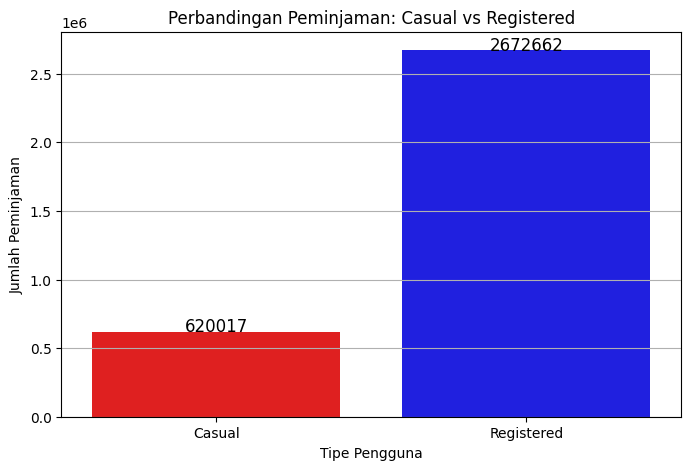

Total Peminjaman Casual: 620017
Total Peminjaman Registered: 2672662


In [125]:
# Perbandingan Peminjaman: Casual vs Registered
# Membuat DataFrame sementara untuk visualisasi
user_type_df = pd.DataFrame({'User Type': ['Casual', 'Registered'], 'Count': [user_type['casual'], user_type['registered']]})

# Plot diagram batang
plt.figure(figsize=(8, 5))
sns.barplot(x='User Type', y='Count', data=user_type_df, palette=['red', 'blue'])

# Menambahkan label & judul
plt.xlabel("Tipe Pengguna")
plt.ylabel("Jumlah Peminjaman")
plt.title("Perbandingan Peminjaman: Casual vs Registered")
plt.grid(axis='y')

# Menampilkan nilai di atas batang
for index, value in enumerate(user_type_df['Count']):
    plt.text(index, value + 100, str(value), ha='center', fontsize=12)

plt.show()

# Menampilkan total peminjaman di terminal
print(f"Total Peminjaman Casual: {user_type['casual']}")
print(f"Total Peminjaman Registered: {user_type['registered']}")


# Insight
- Peminjaman sepeda lebih didominasi oleh pengguna registered.
- Potensi pertumbuhan ada di segmen pengguna casual, yang bisa ditingkatkan dengan strategi pemasaran yang tepat.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8936\2741947453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_trend, palette='coolwarm')


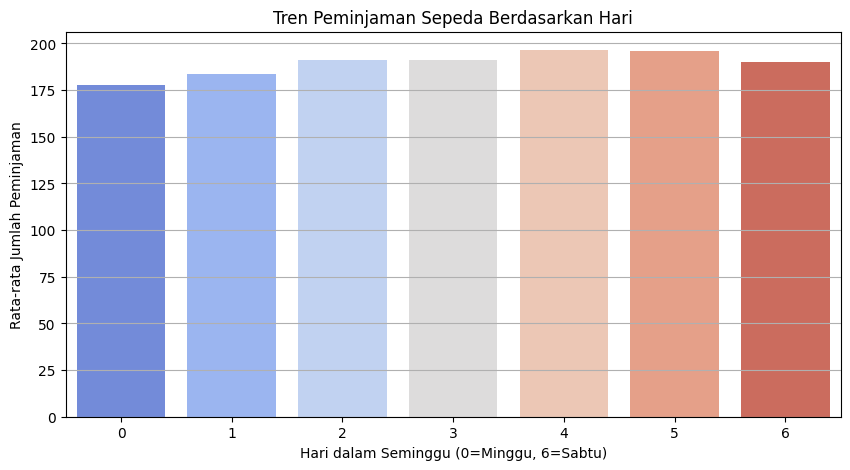

In [126]:
#  Pola Peminjaman Berdasarkan Hari dalam Seminggu
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=day_trend, palette='coolwarm')
plt.xlabel("Hari dalam Seminggu (0=Minggu, 6=Sabtu)")
plt.ylabel("Rata-rata Jumlah Peminjaman")
plt.title("Tren Peminjaman Sepeda Berdasarkan Hari")
plt.grid(axis='y')
plt.show()

# Insight
- Mayoritas peminjaman sepeda terjadi pada hari kerja, menunjukkan bahwa sepeda lebih banyak digunakan sebagai transportasi utama.
- Akhir pekan memiliki potensi untuk ditingkatkan dengan strategi pemasaran yang tepat dan benar.

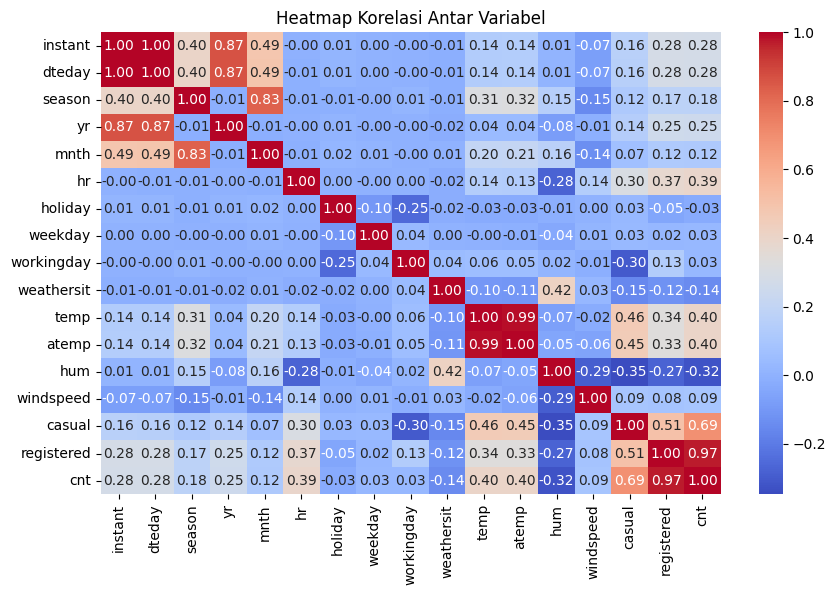

In [127]:
#  Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Insight
-  Pengguna registered berkontribusi besar terhadap total peminjaman. hal ini bisa menjadi target utama untuk strategi loyalitas.
-  Kelembapan dan kecepatan angin sedikit mengurangi jumlah peminjaman. Orang cenderung menghindari bersepeda saat kondisi terlalu lembap atau berangin.

# Analisis Lanjutan

# Menggunakan metode Manual Grouping

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8936\3394662289.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='cnt', data=time_trend, palette='coolwarm', order=['Pagi', 'Siang', 'Sore', 'Malam'])


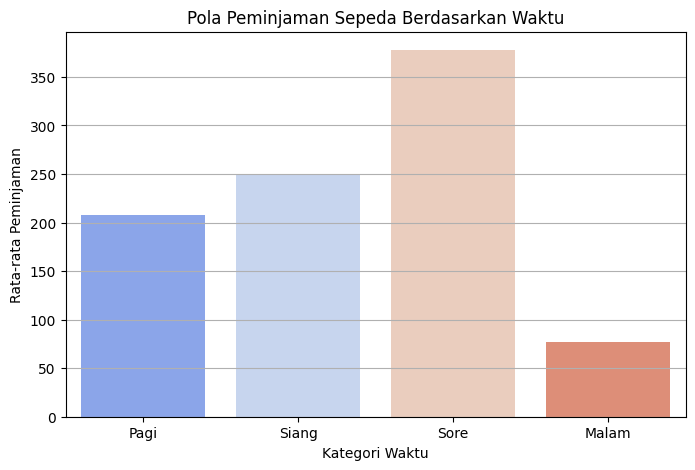

  time_category         cnt
0         Malam   77.359071
1          Pagi  208.100688
2         Siang  249.788679
3          Sore  377.629973


In [128]:
# Buat kategori waktu
def time_category(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 16:
        return 'Siang'
    elif 16 <= hour < 20:
        return 'Sore'
    else:
        return 'Malam'

# Tambahkan kolom kategori waktu
df['time_category'] = df['hr'].apply(time_category)

# Agregasi jumlah peminjaman berdasarkan kategori waktu
time_trend = df.groupby('time_category')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='time_category', y='cnt', data=time_trend, palette='coolwarm', order=['Pagi', 'Siang', 'Sore', 'Malam'])
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman")
plt.title("Pola Peminjaman Sepeda Berdasarkan Waktu")
plt.grid(axis='y')
plt.show()

# Tampilkan data
print(time_trend)

# Insight
- Pagi dan Sore menunjukan bahwa waktu Peminjaman tinggi, kemungkinan besar karena jam berangkat dan pulang kerja/sekolah.
- Siang dan malam hari memiliki peminjaman lebih rendah, kemungkinan karena faktor suhu dan kurangnya aktivitas di luar ruangan.

# Conclusion

- Pertanyaan 1: Berdasarkan analisis bike sharing dataset waktu Peminjaman sepeda tertinggi terjadi pada jam sibuk pagi (07:00-09:00) dan sore (17:00-19:00).
- Pertanyaan 2: Berdasarkan analisis data Pengguna Registered mendominasi peminjaman sepeda dibandingkan dengan Casual dan Pengguna Casual masih cukup signifikan, meskipun jumlahnya lebih kecil dibandingkan pengguna terdaftar.

In [129]:
# Simpan dataset ke all_data.csv
df.to_csv("dashboard/all_data.csv", index=False)